In [4]:
import matplotlib as mpl
import numpy as np
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
p = 1
pd.set_option('display.max_columns', None)

file_name = f'../data/p{p}/p{p}_main.csv'  # Adjust this format based on your file naming
data = pd.read_csv(file_name)
data.sample()

,trial_num,move_times,elbow_start_volts,elbow_start_pix,elbow_start_cm,elbow_start_deg,elbow_end_volts,elbow_end_pix,elbow_end_cm,elbow_end_deg,cursor_end_pix,curs_end_cm,curs_end_deg,mean_velocity,error,block,trial_delay,target_cm,target_deg,target_pix,rt,target_pos,target_amp,full_feedback,terminal_feedback,rotation_direction,rotation,rotation_angle,clamp,clamp_angle,vibration,trial_type
76,77,0.512851,4.199634,-1690.994476,-52.642799,75.391851,3.566457,-53.085698,-1.652625,119.133844,-53.085698,-1.652625,119.133844,85.291849,-4.017962,main,2.078,3.031125,123.151806,97.365939,1.463071,0,1,0,0,0,0,0,0,0,0,0


In [18]:
mean_scores = data.groupby('vibration')['error'].mean()
differences = mean_scores - mean_scores.loc[0]
print(f"Differences from Condition 0:")
print(differences)
differences.drop(0, inplace=True)
print(differences)

Differences from Condition 0:
vibration
0    0.000000
1   -4.119789
2   -3.596897
3   -6.288462
Name: error, dtype: float64
vibration
1   -4.119789
2   -3.596897
3   -6.288462
Name: error, dtype: float64


C:\Users\gesch\AppData\Local\Temp\ipykernel_27848\2917114578.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(["None", "Dual", "Triceps", "Biceps"])


[Text(0, 0, 'None'),
 Text(1, 0, 'Dual'),
 Text(2, 0, 'Triceps'),
 Text(3, 0, 'Biceps')]

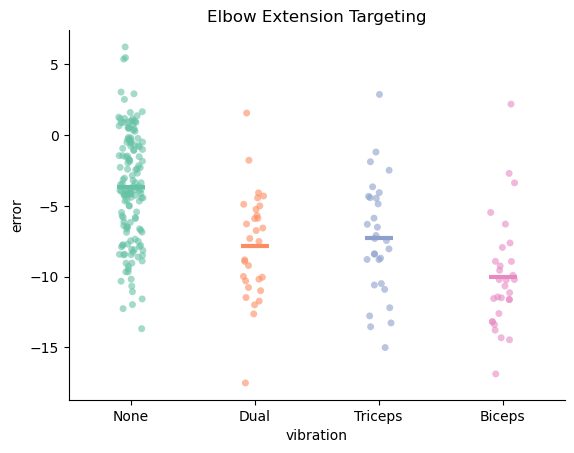

In [20]:
plt.figure()
sns.stripplot(
    data=data, x="vibration", y="error", hue="vibration",
    dodge=False, alpha=.6, legend=False, palette="Set2"
)
fig = sns.pointplot(
    data=data, x="vibration", y="error", hue="vibration",
    dodge=0, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3, palette="Set2",
    legend=False
)
plt.title('Elbow Extension Targeting')
fig.set_xticklabels(["None", "Dual", "Triceps", "Biceps"])

Text(0, 0.5, 'Error')

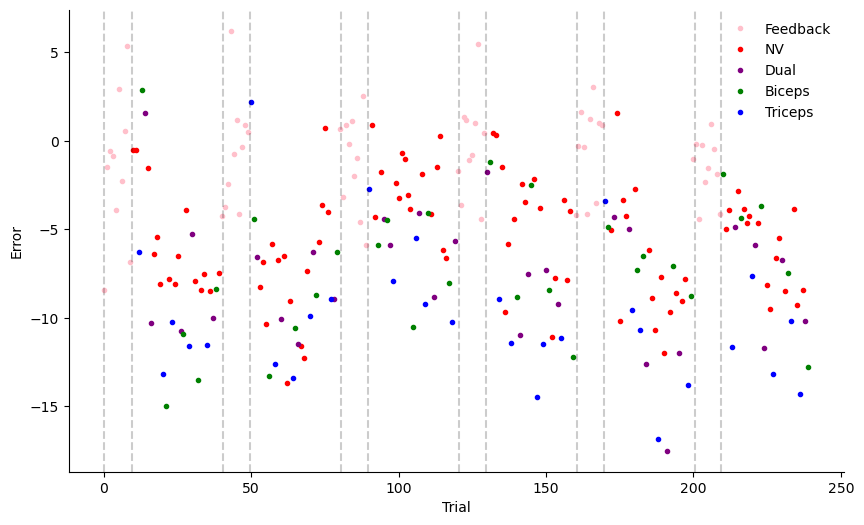

In [22]:
nv = data[(data["terminal_feedback"] == 0) & (data['vibration'] == 0)]
biceps = data[(data["terminal_feedback"] == 0) & (data['vibration'] == 2)]
triceps = data[(data["terminal_feedback"] == 0) & (data['vibration'] == 3)]
dual = data[(data["terminal_feedback"] == 0) & (data['vibration'] == 1)]
verdicial_data = data[data["terminal_feedback"] == 1]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(verdicial_data['error'], '.', color="pink")
ax.plot(nv['error'], '.', color='red')
ax.plot(dual['error'], '.', color='purple')
ax.plot(biceps['error'], '.', color='green')
ax.plot(triceps['error'], '.', color='blue')
lines = [0, 9.5, 40.5, 49.5, 80.5, 89.5, 120.5, 129.5, 160.5, 169.5, 200.5, 209.5]
for line in lines:
    ax.axvline(line, linestyle='--', color='black', alpha=0.2)
# ax.set_ylim([-15, 8])
ax.legend(['Feedback','NV', 'Dual', 'Biceps', 'Triceps'], loc='upper right',  frameon=False)
ax.set_xlabel("Trial")
ax.set_ylabel("Error")